> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [ ]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [ ]:
def corr2d(X: np.array, K: np.array) -> np.array:

    # no padding for now and assume stride = 1
    X_height, X_width = X.shape
    K_height, K_width = K.shape
    
    output_height = X_height - K_height + 1
    output_width = X_width - K_width + 1
    
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
      for j in range(output_width):
        ##print(X[i][j])
        output[i][j] = np.dot((X[i: i + K_height, j: j + K_width]).flatten(), K.flatten())
    
    return output


In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [ ]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    X_depth, X_height, X_width= X.shape
    K_depth, K_height, K_width = K.shape
    
    output_height = X_height - K_height + 1
    output_width = X_width - K_width + 1

    
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
      for j in range(output_width):
        for k in range(X_depth):
          output[i][j] = np.dot((X[k: k + 1, i: i + K_height, j: j + K_width]).flatten(), K[k:k+1, : , :].flatten()) + output[i][j]
        ##output[i][j] = output[i][j] / (K_height * K_width * K_depth)  
    return output
    

In [ ]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [ ]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)

    num_in_channels, n_h, n_w = X.shape
    num_out_channels, num_in_channels, k_h, k_w = K.shape
    o_h = n_h - k_h + 1
    o_w = n_h - k_h + 1

    output = corr2d_multiple_input_channels(X, np.squeeze(K [0:1, : , : , : ])).reshape((1, o_h, o_w))        
    for i in range(num_out_channels):      
      if i == 0:
        continue
      else:
        K_particular = np.squeeze(K [i:i+1, : , : , : ])
        output = np.append(output,corr2d_multiple_input_channels(X, K_particular).reshape((1,o_h, o_w)), axis = 0)
        
    return(output) 
    

In [ ]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [ ]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [ ]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K.reshape((1,2)))
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [ ]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [104]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
  X_height, X_width = X.shape
  out_h = X_height - K[0] + 1
  out_w = X_width - K[1] + 1
  out = np.zeros((out_h, out_w))
  for i in range(out_h):
    for j in range(out_w):
      out[i][j] = np.amax(X[i:i + K[0], j:j + K[1]])
  return out

  

    # write a function for this job

In [105]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [84]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [85]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [86]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


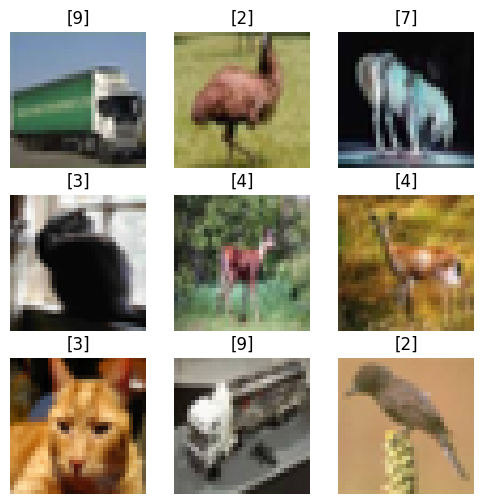

In [87]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [88]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

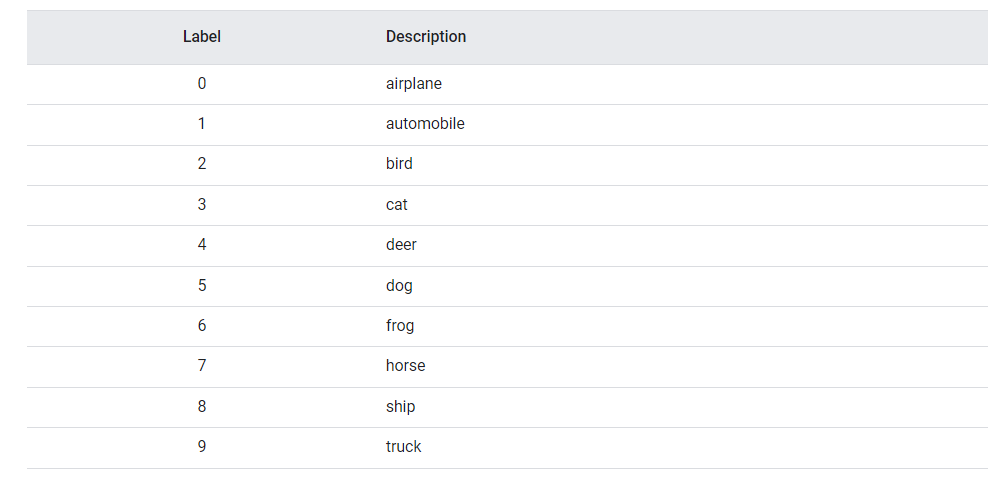

In [89]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [90]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [91]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [92]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer: Firstly, optimizers are algorithms which update the model based on the response to the output of the loss function. It assists in minimizing the loss function.
The name Adam in Adam optimizer means adaptive moment estimation. Unlike gradient descent which uses a constant learning rate to minimize the loss function, Adam optimizer  
computes adaptive learning rate. It is a combination of 'gradient descent with momentum' algorithm' and the RMSP algorithm, which stands for Root Mean Square Propagation.

"""

"\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer: Firstly, optimizers are algorithms which update the model based on the response to the output of the loss function. It assists in minimizing the loss function.\nThe name Adam in Adam optimizer means adaptive moment estimation. Unlike gradient descent which uses a constant learning rate to minimize the loss function, Adam optimizer  \ncomputes adaptive learning rate. It is a combination of 'gradient descent with momentum' algorithm' and the RMSP algorithm, which stands for Root Mean Square Propagation.\n\n"

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [93]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 47s 51ms/step - loss: 2.4684 - accuracy: 0.0995 - val_loss: 2.3032 - val_accuracy: 0.1043
Epoch 2/10
875/875 [==============================] - 70s 80ms/step - loss: 2.3020 - accuracy: 0.1015 - val_loss: 2.3026 - val_accuracy: 0.0997
Epoch 3/10
875/875 [==============================] - 60s 69ms/step - loss: 2.3012 - accuracy: 0.1038 - val_loss: 2.3032 - val_accuracy: 0.0980
Epoch 4/10
875/875 [==============================] - 57s 65ms/step - loss: 2.3009 - accuracy: 0.1027 - val_loss: 2.3029 - val_accuracy: 0.0997
Epoch 5/10
875/875 [==============================] - 65s 74ms/step - loss: 2.3014 - accuracy: 0.1020 - val_loss: 2.3047 - val_accuracy: 0.0954
Epoch 6/10
875/875 [==============================] - 56s 65ms/step - loss: 2.3013 - accuracy: 0.1012 - val_loss: 2.3030 - val_accuracy: 0.0974
Epoch 7/10
875/875 [==============================] - 52s 59ms/step - loss: 2.3044 - accuracy: 0.1025 - val_loss: 2.3055 - val_accuracy: 0.0973
Epo

In [ ]:
""" 
Write about validation accuracy in 100 words.

Answer: Validation accuracy is the measure of how accurate the machine learning model is in predicting the output for the validation dataset. The X_axis of the plot represents the epoch number and the 
Y-axis represents the validation accuracy. The closer it is to the train accuracy, the better is the performance of our model. We calculate this Accuracy by dividing the number of accurately predicted records by the total number of records.
Thus, the closer the value is to 1, the more accurate our model is.
"""

' \nWrite about validation accuracy in 100 words.\n\nAnswer: \n'

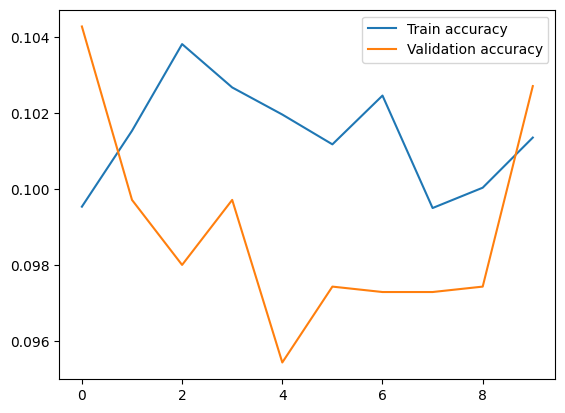

In [94]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [95]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [96]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [97]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 39s 43ms/step - loss: 2.4743 - accuracy: 0.2455 - val_loss: 1.7969 - val_accuracy: 0.3350
Epoch 2/20
875/875 [==============================] - 35s 40ms/step - loss: 1.7025 - accuracy: 0.3741 - val_loss: 1.7179 - val_accuracy: 0.3634
Epoch 3/20
875/875 [==============================] - 34s 39ms/step - loss: 1.5606 - accuracy: 0.4270 - val_loss: 1.5652 - val_accuracy: 0.4399
Epoch 4/20
875/875 [==============================] - 53s 61ms/step - loss: 1.4764 - accuracy: 0.4668 - val_loss: 1.5332 - val_accuracy: 0.4584
Epoch 5/20
875/875 [==============================] - 38s 44ms/step - loss: 1.4195 - accuracy: 0.4882 - val_loss: 1.4783 - val_accuracy: 0.4714
Epoch 6/20
875/875 [==============================] - 46s 53ms/step - loss: 1.3546 - accuracy: 0.5119 - val_loss: 1.4007 - val_accuracy: 0.5056
Epoch 7/20
875/875 [==============================] - 37s 42ms/step - loss: 1.2918 - accuracy: 0.5395 - val_loss: 1.3475 - val_accuracy:

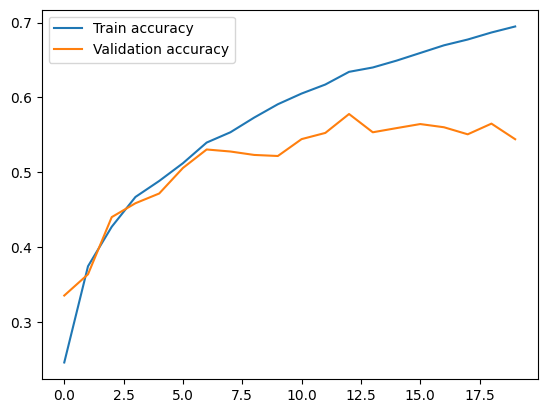

In [98]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

# please take note of this change: 
**[For all the subjective questions after this question( in the ss ) you need put the link of articles that you referred while searching about the question.]**\
Ideally you should refer to at least 2 articles for each of those questions.\
Also you do not need to go into deep maths of those( a qualitative answer is what we will be looking for)

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: When the machine learning model goes through the entire training data quite a lot, it sets the wiegths of the different features in such a way that it exactly replicates the training data. If we test the model using the training data, we will be getting zero to a very negligible loss, i.e. the predictions are almost accurate. But this is not the case because when we test the model using the test data, the loss will increase a lot. This is because of overfiiting and the model has not generalized the output based on the training data.
Underffiting is a scenario where the machine learning model is unable to calculate the weights of the features to create a desirable output. Thus, the error percentage is very high not only for the test dataset but also for the training dataset. This situation is termed as underfiiting and its most probable solution is the model has to go through the training data set few more times.

P.S - I wrote the answer to overfiiting on my own and for underfiiting I referred https://www.ibm.com/topics/underfitting#:~:text=the%20next%20step-,What%20is%20underfitting%3F,training%20set%20and%20unseen%20data.
"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Regularization techniques are used to prevent overfiiting. It allows the model to learn properly and not 'memorize' the training dataset. It normalizes and moderates weights attached to a feature or a neuron so that algorithms do not rely on just a few features or neurons to predict the result. 
The three main types of regularization techniques are  - 
:::Ridge Regression (L2 Norm) - It is also known as L2 norm. In this technique we add the sum of the weight's square to the loss function thereby creating a new loss fucntion.
In the formula there is a parameter called lambda which needs to be tuned using a cross-validation dataset. In the beginning the value of lambda is zero. Thus, the model uses the core loss function on the
training data set. But as the value of lambda increase, the model will minimize the weight's value to prevent overfitting.
:::Lasso Regression - The difference between the formula of Lasso and Ridge regression is that in Lasso, the absolute value of the wieghts are used inseted of the sqaure of weights. Due to this reason, this
technique performs feature selection along with regularzation.
:::Dropout - This regularization technique is used in neural networks.

Link - https://www.einfochips.com/blog/regularization-make-your-machine-learning-algorithms-learn-not-memorize/
"""

In [106]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: In this technique nodes are droped out to prevent overfitting by the machine learning model. Let x: {1, 2, 3, 4, 5} be the input to the fully connected layer. We have a dropout layer with probability lets say, p = 0.4. During the forward propagation (training) from the input x, 40% of the nodes would be dropped, i.e. the x could become {1, 0, 3, 4, 5} or {1, 2, 0, 4, 5} and so on. Similarly, it applied to the hidden layers.
"""

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: In this technique nodes are droped out to prevent overfitting by the machine learning model. Let x: {1, 2, 3, 4, 5} be the input to the fully connected layer. We have a dropout layer with probability lets say, p = 0.4. During the forward propagation (training) from the input x, 40% of the nodes would be dropped, i.e. the x could become {1, 0, 3, 4, 5} or {1, 2, 0, 4, 5} and so on. Similarly, it applied to the hidden layers.\n'

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: The difference between the formula of Lasso and Ridge regression is that in Lasso, the absolute value of the wieghts are used inseted of the sqaure of weights. Due to this reason, this
technique performs feature selection along with regularzation.
"""

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: It is also known as L2 norm. In this technique we add the sum of the weight's square to the loss function thereby creating a new loss fucntion.
In the formula there is a parameter called lambda which needs to be tuned using a cross-validation dataset. In the beginning the value of lambda is zero. Thus, the model uses the core loss function on the
training data set. But as the value of lambda increase, the model will minimize the weight's value to prevent overfitting.
"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: 
"""

####**Did you take note of the change in the cell at the start of these subjective questions ?**

In [ ]:
"ANS(Yes/No):  Yes     "